![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/python_logo.png)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Excel?,-Better-pandas" data-toc-modified-id="Excel?,-Better-pandas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Excel?, Better pandas</a></span><ul class="toc-item"><li><span><a href="#Read-data-from-the-Excel-file" data-toc-modified-id="Read-data-from-the-Excel-file-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Read data from the Excel file</a></span></li><li><span><a href="#Using-the-ExcelFile-class-to-read-multiple-sheets" data-toc-modified-id="Using-the-ExcelFile-class-to-read-multiple-sheets-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Using the ExcelFile class to read multiple sheets</a></span><ul class="toc-item"><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Exploring the data</a></span></li></ul></li><li><span><a href="#Getting-statistical-information-about-the-data" data-toc-modified-id="Getting-statistical-information-about-the-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Getting statistical information about the data</a></span></li><li><span><a href="#Reading-files-with-no-header-and-skipping-records" data-toc-modified-id="Reading-files-with-no-header-and-skipping-records-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Reading files with no header and skipping records</a></span></li><li><span><a href="#Reading-a-subset-of-columns" data-toc-modified-id="Reading-a-subset-of-columns-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Reading a subset of columns</a></span></li><li><span><a href="#Applying-formulas-on-the-columns" data-toc-modified-id="Applying-formulas-on-the-columns-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Applying formulas on the columns</a></span></li><li><span><a href="#Pivot-Table-in-pandas" data-toc-modified-id="Pivot-Table-in-pandas-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Pivot Table in pandas</a></span></li><li><span><a href="#Exporting-the-results-to-Excel" data-toc-modified-id="Exporting-the-results-to-Excel-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Exporting the results to Excel</a></span></li></ul></li></ul></div>

# Excel?, Better pandas
Excel is one of the most popular and widely-used data tools; it’s hard to find an organization that doesn’t work with it in some way. From analysts, to sales VPs, to CEOs, various professionals use Excel for both quick stats and serious data crunching.

With Excel being so pervasive, data professionals must be familiar with it. You’ll also want a tool that can easily read and write Excel files — pandas is perfect for this.

Pandas has excellent methods for reading all kinds of data from Excel files. You can also export your results from pandas back to Excel, if that’s preferred by your intended audience. Pandas is great for other routine data analysis tasks, such as:

- quick Exploratory Data Analysis (EDA)
- drawing attractive plots
- feeding data into machine learning tools like scikit-learn
- building machine learning models on your data
- taking cleaned and processed data to any number of data tools

Pandas is better at automating data processing tasks than Excel, including processing Excel files.

![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/img-panda-1.png)

## Read data from the Excel file
We need to first import the data from the Excel file into pandas. To do that, we start by importing the pandas module.

We then use the pandas’ read_excel method to read in data from the Excel file. The easiest way to call this method is to pass the file name. If no sheet name is specified then it will read the first sheet in the index (as shown below).

The file has sheets which have the movies corresponding to a specific year 2010,2009,2008 and so on

In [158]:
import pandas as pd
excel_file = 'https://github.com/fjvarasc/DSPXI/blob/master/data/IMDB-Movie-Data.xlsx?raw=true'
movies = pd.read_excel(excel_file)

Here, the 'read_excel' method read the data from the Excel file into a pandas DataFrame object. Pandas defaults to storing data in DataFrames. We then stored this DataFrame into a variable called 'movies'.

Pandas has a built-in 'DataFrame.head()' method that we can use to easily display the first few rows of our DataFrame. If no argument is passed, it will display first five rows. If a number is passed, it will display the equal number of rows from the top.

In [137]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
1,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.97,63.0
2,142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,56.0
3,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
4,220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010,117,7.7,456749,48.04,66.0


Excel files quite often have multiple sheets and the ability to read a specific sheet or all of them is very important. To make this easy, the pandas `read_excel` method takes an argument called `sheetname` that tells pandas which sheet to read in the data from. For this, you can either use the sheet name or the sheet number. Sheet numbers start with zero. If the `sheetname` argument is not given, it defaults to zero and pandas will import the first sheet.

By default, pandas will automatically assign a numeric index or row label starting with zero. You may want to leave the default index as such if your data doesn’t have a column with unique values that can serve as a better index. In case there is a column that you feel would serve as a better index, you can override the default behavior by setting 'index_col' property to a column. It takes a numeric value for setting a single column as index or a list of numeric values for creating a multi-index.

In the below code, we are choosing the first column, ‘Title’, as index (index=0) by passing zero to the `index_col` argument.

In [138]:
movies_sheet1 = pd.read_excel(excel_file, sheet_name=0, index_col=0)
movies_sheet1.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.97,63.0
142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,56.0
159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010,117,7.7,456749,48.04,66.0


As you noticed above, our Excel data file has three sheets. We already read the first sheet in a DataFrame above. Now, using the same syntax, we will read in rest of the two sheets too.

In [139]:
movies_sheet2 = pd.read_excel(excel_file, sheet_name=1, index_col=0)
movies_sheet2.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
78,Inglourious Basterds,"Adventure,Drama,War","In Nazi-occupied France during World War II, a...",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,M√©lanie Lau...",2009,153,8.3,959065,120.52,69.0
88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
141,Star Trek,"Action,Adventure,Sci-Fi",The brash James T. Kirk tries to live up to hi...,J.J. Abrams,"Chris Pine, Zachary Quinto, Simon Pegg, Leonar...",2009,127,8.0,526324,257.70,82.0
148,Watchmen,"Action,Drama,Mystery","In 1985 where former superheroes exist, the mu...",Zack Snyder,"Jackie Earle Haley, Patrick Wilson, Carla Gugi...",2009,162,7.6,410249,107.50,56.0
252,Kynodontas,"Drama,Thriller","Three teenagers live isolated, without leaving...",Yorgos Lanthimos,"Christos Stergioglou, Michele Valley, Angeliki...",2009,94,7.3,50946,0.11,73.0


In [140]:
movies_sheet3 = pd.read_excel(excel_file, sheet_name=2, index_col=0)
movies_sheet3.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
129,Mamma Mia!,"Comedy,Family,Musical",The story of a bride-to-be trying to find her ...,Phyllida Lloyd,"Meryl Streep, Pierce Brosnan, Amanda Seyfried,...",2008,108,6.4,153481,143.70,51.0
166,Twilight,"Drama,Fantasy,Romance",A teenage girl risks everything when she falls...,Catherine Hardwicke,"Kristen Stewart, Robert Pattinson, Billy Burke...",2008,122,5.2,361449,191.45,56.0
178,Tropic Thunder,"Action,Comedy","Through a series of freak occurrences, a group...",Ben Stiller,"Ben Stiller, Jack Black, Robert Downey Jr., Je...",2008,107,7.0,321442,110.42,71.0
204,Iron Man,"Action,Adventure,Sci-Fi","After being held captive in an Afghan cave, bi...",Jon Favreau,"Robert Downey Jr., Gwyneth Paltrow, Terrence H...",2008,126,7.9,737719,318.30,79.0


Since all the three sheets have similar data but for different recordsmovies, we will create a single DataFrame from all the three DataFrames we created above. We will use the pandas `concat` method for this and pass in the names of the three DataFrames we just created and assign the results to a new DataFrame object, `movies`. By keeping the DataFrame name same as before, we are over-writing the previously created DataFrame.

In [141]:
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

We can check if this concatenation by checking the number of rows in the combined DataFrame by calling the method `shape` on it that will give us the number of rows and columns.

In [142]:
movies.shape

(163, 11)

## Using the ExcelFile class to read multiple sheets
We can also use the ExcelFile class to work with multiple sheets from the same Excel file. We first wrap the Excel file using `ExcelFile` and then pass it to `read_excel` method.

In [159]:
xlsx = pd.ExcelFile(excel_file)
movies_sheets = []
for sheet in xlsx.sheet_names:
    movies_sheets.append(xlsx.parse(sheet))
movies = pd.concat(movies_sheets)

If you are reading an Excel file with a lot of sheets and are creating a lot of DataFrames, `ExcelFile` is more convenient and efficient in comparison to `read_excel`. 
With ExcelFile, you only need to pass the Excel file once, and then you can use it to get the DataFrames. When using `read_excel`, you pass the Excel file every time and hence the file is loaded again for every sheet. This can be a huge performance drag if the Excel file has many sheets with a large number of rows.

### Exploring the data
Now that we have read in the movies data set from our Excel file, we can start exploring it using pandas. A pandas DataFrame stores the data in a tabular format, just like the way Excel displays the data in a sheet. Pandas has a lot of built-in methods to explore the DataFrame we created from the Excel file we just read in.

We already introduced the method `head` in the previous section that displays few rows from the top from the DataFrame. Let’s look at few more methods that come in handy while exploring the data set.

We can use the `shape` method to find out the number of rows and columns for the DataFrame.

In [160]:
movies.shape

(260, 12)

This tells us our Excel file has 260 records and 12 columns or observations. This can be useful in reporting the number of records and columns and comparing that with the source data set.

We can use the `tail` method to view the bottom rows. If no parameter is passed, only the bottom five rows are returned.

In [145]:
movies.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
39,919,Perfume: The Story of a Murderer,"Crime,Drama,Fantasy","Jean-Baptiste Grenouille, born with a superior...",Tom Tykwer,"Ben Whishaw, Dustin Hoffman, Alan Rickman,Fran...",2006,147,7.5,199387,2.21,56.0
40,925,Superman Returns,"Action,Adventure,Sci-Fi","Superman reappears after a long absence, but i...",Bryan Singer,"Brandon Routh, Kevin Spacey, Kate Bosworth, Ja...",2006,154,6.1,246797,200.07,72.0
41,936,Talladega Nights: The Ballad of Ricky Bobby,"Action,Comedy,Sport",#1 NASCAR driver Ricky Bobby stays atop the he...,Adam McKay,"Will Ferrell, John C. Reilly, Sacha Baron Cohe...",2006,108,6.6,137502,148.21,66.0
42,960,Lucky Number Slevin,"Crime,Drama,Mystery",A case of mistaken identity lands Slevin into ...,Paul McGuigan,"Josh Hartnett, Ben Kingsley, Morgan Freeman, L...",2006,110,7.8,271940,22.49,53.0
43,966,Inland Empire,"Drama,Mystery,Thriller",As an actress starts to adopt the persona of h...,David Lynch,"Laura Dern, Jeremy Irons, Justin Theroux, Karo...",2006,180,7.0,44227,NaN,NaN


In Excel, you’re able to sort a sheet based on the values in one or more columns. In pandas, you can do the same thing with the `sort_values method`. For example, let’s sort our movies DataFrame based on the Revenue column.

In [146]:
sorted_by_gross = movies.sort_values(['Revenue (Millions)'], ascending=False)

Since we have the data sorted by values in a column, we can do few interesting things with it. For example, we can display the top 10 movies by Revenues.

In [147]:
sorted_by_gross['Revenue (Millions)'].head(10)

1     760.51
0     533.32
1     423.03
37    414.98
32    402.08
12    336.53
25    334.19
7     318.76
4     318.30
34    317.01
Name: Revenue (Millions), dtype: float64

We can also create a plot for the top 10 movies by Revenue. As we saw in previous sections Pandas makes it easy to visualize your data with plots and charts through matplotlib, a popular data visualization library. With a couple lines of code, you can start plotting. Moreover, matplotlib plots work well inside Jupyter Notebooks since you can displace the plots right under the code.

First, we import the matplotlib module and set matplotlib to display the plots right in the Jupyter Notebook.

We will draw a bar plot where each bar will represent one of the top 10 movies. We can do this by calling the plot method and setting the argument kind to barh. This tells matplotlib to draw a horizontal bar plot.

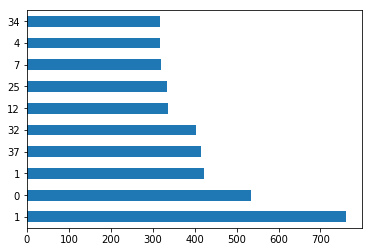

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
sorted_by_gross['Revenue (Millions)'].head(10).plot(kind="barh")
plt.show()

Let’s create a histogram of IMDB Scores to check the distribution of IMDB Scores across all movies. Histograms are a good way to visualize the distribution of a data set. We use the `plot` method on the IMDB Scores series from our movies DataFrame and pass it the argument.

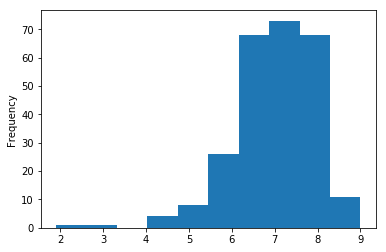

In [149]:
movies['Rating'].plot(kind="hist")
plt.show()

This data visualization suggests that most of the IMDB Scores fall between six and eight.

## Getting statistical information about the data
Pandas has some very handy methods to look at the statistical data about our data set. For example, we can use the `describe` method to get a statistical summary of the data set.

In [150]:
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,260.000000,260.000000,260.000000,260.000000,2.600000e+02,246.000000,244.000000
mean,592.896154,2008.115385,115.830769,6.957692,2.589859e+05,98.641545,60.344262
std,256.899483,1.412217,19.970302,0.954394,2.210388e+05,103.489295,16.870736
min,40.000000,2006.000000,84.000000,1.900000,2.410000e+02,0.020000,15.000000
25%,416.250000,2007.000000,101.000000,6.500000,1.170815e+05,25.170000,48.750000
50%,611.500000,2008.000000,112.000000,7.100000,1.998800e+05,67.610000,61.500000
75%,815.250000,2009.000000,125.000000,7.700000,3.297092e+05,134.557500,73.000000
max,998.000000,2010.000000,191.000000,9.000000,1.791916e+06,760.510000,98.000000


The `describe` method displays below information for each of the columns.

- the count or number of values
- mean
- standard deviation
- minimum, maximum
- 25%, 50%, and 75% quantile

Please note that this information will be calculated only for the numeric values.

We can also use the corresponding method to access this information one at a time. For example, to get the `mean` of a particular column, you can use the mean method on that column.

In [151]:
movies['Revenue (Millions)'].mean()

98.64154471544715

Just like `mean`, there are methods available for each of the statistical information we want to access. You can the pandas cheat sheet.

## Reading files with no header and skipping records
Earlier in this tutorial, we saw some ways to read a particular kind of Excel file that had headers and no rows that needed skipping. Sometimes, the Excel sheet doesn’t have any header row. For such instances, you can tell pandas not to consider the first row as header or columns names. And If the Excel sheet’s first few rows contain data that should not be read in, you can ask the `read_excel` method to skip a certain number of rows, starting from the top.

This file obviously has no header and first 3 rows are not actual records and hence should not be read in. We can tell `read_excel` there is no `header` by setting argument `header` to `None` and we can skip first four rows by setting argument `skiprows` to 3.

In [152]:
movies_skip_rows = pd.read_excel("movies-no-header-skip-rows.xlsx", header=None, skiprows=3)
movies_skip_rows.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
1,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.97,63.0
2,142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,56.0
3,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
4,220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010,117,7.7,456749,48.04,66.0


We skipped four rows from the sheet and used none of the rows as the header. Also, notice that one can combine different options in a single read statement. To skip rows at the bottom of the sheet, you can use option `skip_footer`, which works just like `skiprows`, the only difference being the rows are counted from the bottom upwards.

The column names in the previous DataFrame are numeric and were allotted as default by the pandas. We can rename the column names to descriptive ones by calling the method `columns` on the DataFrame and passing the column names as a list.

In [153]:
movies_skip_rows.columns = ['Rank','Title','Genre','Description','Director','Actors','Year','Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore']
movies_skip_rows.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
1,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.97,63.0
2,142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,56.0
3,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
4,220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010,117,7.7,456749,48.04,66.0


Now that we have seen how to read a subset of rows from the Excel file, we can learn how to read a subset of columns.

## Reading a subset of columns
Although read_excel defaults to reading and importing all columns, you can choose to import only certain columns. By passing the list, we are telling the `read_excel` method to read only the columns specified as index (the first column being indexed zero).

In [154]:
movies_subset_columns = pd.read_excel(excel_file, usecols=[0,1,2,3,4,5,6])
movies_subset_columns.head()

,Rank,Title,Genre,Description,Director,Actors,Year
0,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010
1,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010
2,142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010
3,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010
4,220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010


## Applying formulas on the columns
One of the much-used features of Excel is to apply formulas to create new columns from existing column values. In our Excel file, we have Revenue column. We can get Net earnings by subtracting taxes 19%. We could then apply this formula in the Excel file to all the rows. We can do this in pandas also as shown below.

In [155]:
movies = pd.read_excel("IMDB-Movie-Data-full.xlsx", header=0)

movies["Net Earnings"] = movies["Revenue (Millions)"] * 0.81 # 19% taxes

Above, we used pandas to create a new column called Net Earnings, and populated it with the difference of Gross Earnings and Budget. It’s worth noting the difference here in how formulas are treated in Excel versus pandas. In Excel, a formula lives in the cell and updates when the data changes – with Python, the calculations happen and the values are stored – if Gross Earnings for one movie was manually changed, Net Earnings won’t be updated.

Let’s use the `sort_values` method to sort the data by the new column we created and visualize the top 10 movies by Net Earnings.

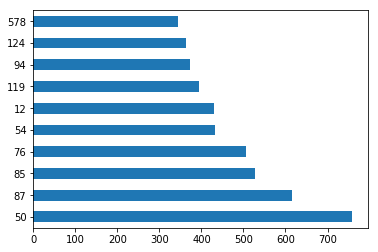

In [156]:
sorted_movies = movies[['Net Earnings']].sort_values(['Net Earnings'], ascending=False)
sorted_movies.head(10)['Net Earnings'].plot.barh()
plt.show()

## Pivot Table in pandas
Advanced Excel users also often use pivot tables. A pivot table summarizes the data of another table by grouping the data on an index and applying operations such as sorting, summing, or averaging. You can use this feature in pandas too.

We need to first identify the column or columns that will serve as the index, and the column(s) on which the summarizing formula will be applied. Let’s start small, by choosing Year as the index column and revenue as the summarization column and creating a separate DataFrame from this data.

In [157]:
movies_subset = movies[['Year', 'Revenue (Millions)']]
movies_subset.head()

,Year,Revenue (Millions)
0,2014,333.13
1,2012,126.46
2,2016,138.12
3,2016,270.32
4,2016,325.02


We now call `pivot_table` on this subset of data. The method `pivot_table` takes a parameter `index`. As mentioned, we want to use Year as the index.

In [158]:
earnings_by_year = movies_subset.pivot_table(index=['Year'])
earnings_by_year.head()

,Revenue (Millions)
Year,
2006,86.296667
2007,87.882245
2008,99.082745
2009,112.601277
2010,105.081579


This gave us a pivot table with grouping on Year and summarization on the sum of Revenues. Notice, we didn’t need to specify Revenue column explicitly as pandas automatically identified it the values on which summarization should be applied.

We can use this pivot table to create some data visualizations. We can call the `plot` method on the DataFrame to create a line plot and call the `show` method to display the plot in the notebook.

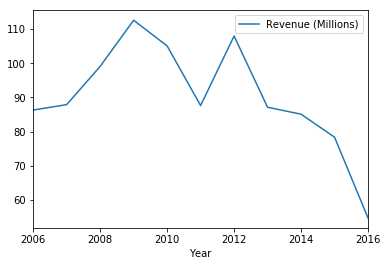

In [159]:
earnings_by_year.plot()
plt.show()

We saw how to pivot with a single column as the index. Things will get more interesting if we can use multiple columns. Let’s create another DataFrame subset but this time we will choose the columns, Country, Language and Gross Earnings.

## Exporting the results to Excel
If you’re going to be working with colleagues who use Excel, saving Excel files out of pandas is important. You can export or write a pandas DataFrame to an Excel file using pandas `to_excel` method. Pandas uses the `xlwt` Python module internally for writing to Excel files. The `to_excel` method is called on the DataFrame we want to export.We also need to pass a filename to which this DataFrame will be written.

In [160]:
movies.to_excel('output.xlsx')

By default, the index is also saved to the output file. However, sometimes the index doesn’t provide any useful information. For example, the movies DataFrame has a numeric auto-increment index, that was not part of the original Excel data.

In [161]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Net Earnings
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,269.8353
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,102.4326
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,111.8772
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,218.9592
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,263.2662


You can choose to skip the index by passing along index-False.

In [162]:
movies.to_excel('output.xlsx', index=False)

We need to be able to make our output files look nice before we can send it out to our co-workers. We can use pandas `ExcelWriter` class along with the `XlsxWriter` Python module to apply the formatting.

We can do use these advanced output options by creating a `ExcelWriter` object and use this object to write to the Excel file. This is very limited in terms of formating.

In [163]:
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')
movies.to_excel(writer, index=False, sheet_name='report')
workbook  = writer.book

Finally, we save the output file by calling the method `save` on the writer object.

In [164]:
writer.save()

As an example, we saved the data with column headers set as bold. And the saved file looks like the image below.

<div class='alert alert-warning' role='light'>
XlsxWriter and Pandas provide very little support for formatting the output data from a dataframe apart from default formatting such as the header and index cells and any cells that contain dates or datetimes. In addition it isn’t possible to format any cells that already have a default format applied.

If you require very controlled formatting of the dataframe output then you would probably be better off using Xlsxwriter directly with raw data taken from Pandas. This as the expenses series directly from a dat
</div>

In [165]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('Expenses02.xlsx')
worksheet = workbook.add_worksheet()

# Add a bold format to use to highlight cells.
bold = workbook.add_format({'bold': True})

# Add a number format for cells with money.
money = workbook.add_format({'num_format': '$#,##0'})

# Write some data headers.
worksheet.write('A1', 'Item', bold)
worksheet.write('B1', 'Cost', bold)

# Some data we want to write to the worksheet.
expenses = (
 ['Rent', 1000],
 ['Gas',   100],
 ['Food',  300],
 ['Gym',    50],
)

# Start from the first cell below the headers.
row = 1
col = 0

# Iterate over the data and write it out row by row.
for item, cost in (expenses):
    worksheet.write(row, col,     item)
    worksheet.write(row, col + 1, cost, money)
    row += 1

# Write a total using a formula.
worksheet.write(row, 0, 'Total',       bold)
worksheet.write(row, 1, '=SUM(B2:B5)', money)

workbook.close()

you can check out more at the [official documents](https://xlsxwriter.readthedocs.io/working_with_pandas.html) and also other libraries [here](https://github.com/python-excel)